### Implement a KNN model to classify the animals in to categorie

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [16]:
df.columns = df.columns.str.strip()

In [17]:
df.shape

(101, 18)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [19]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [20]:
df.isnull().sum().sum()

0

In [21]:
df.duplicated().sum()

0

In [45]:
df.rename({'animal name':'animal_name'},axis=1,inplace=True)

In [71]:
df1 = df.copy()
df1 = df.groupby('animal_name').mean()
df1.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal_name,,,,,,,,,,,,,,,,,
aardvark,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0
antelope,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0
bass,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0
bear,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0
boar,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0


In [72]:
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

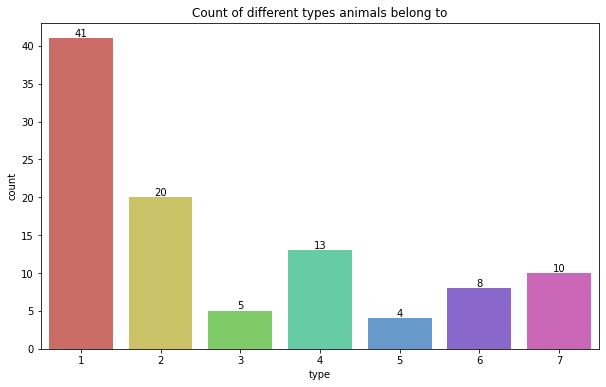

In [73]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='type',data=df, palette='hls')
plt.title('Count of different types animals belong to');
for i in ax.containers:
    ax.bar_label(i,)

In [74]:
# Split into independent and dependent variables

x = df.drop(['type','animal_name'],axis=1)
y = df['type']

In [84]:
y.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [98]:
np.unique(y,return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array([41, 20,  5, 13,  4,  8, 10], dtype=int64))

In [96]:
# Train Test Split

from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [97]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()

In [87]:
x_train = scaler.fit_transform(x_train)

In [88]:
x_test = scaler.transform(x_test)

### <font color='magenta'><b>K-Nearest Neighbor Classifier :

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [116]:
knn_cls = KNeighborsClassifier()

In [117]:
knn_cls.fit(x_train,y_train)

KNeighborsClassifier()

In [118]:
test_pred = knn_cls.predict(x_test)

In [119]:
train_pred = knn_cls.predict(x_train)

In [120]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [121]:
accuracy_score(y_train,train_pred)

0.95

In [122]:
accuracy_score(y_test,test_pred)

1.0

<font color='peach'>The model is not overfitting. The training and test accuracy are good even with default value of k=5. We can still grid search for the best value of k.

In [60]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [65]:
print(confusion_matrix(y_test,test_pred))

[[7 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]


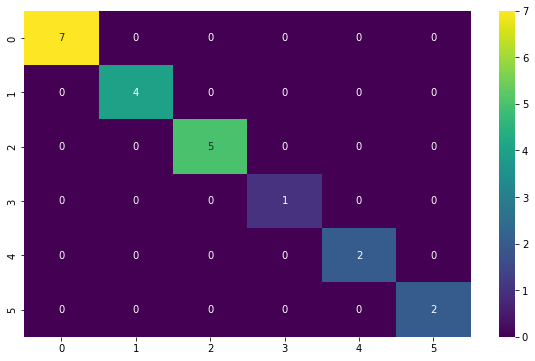

In [76]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, cmap = 'viridis');

### <font color='cyan'><b>Grid Search CV :

In [128]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [104]:
knn = KNeighborsClassifier()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [105]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [106]:
grid_search=grid.fit(x_train, y_train)

In [107]:
grid_search.best_params_

{'n_neighbors': 1}

In [130]:
#visualize grid search

scores_cv =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    scores_cv.append(scores.mean())

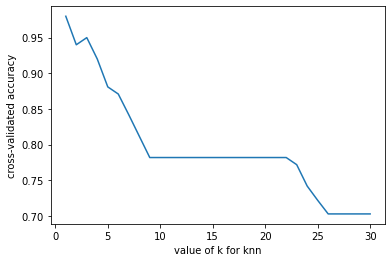

In [131]:
plt.plot(k_range,scores_cv)
plt.xlabel('value of k for knn')
plt.ylabel('cross-validated accuracy');

<font color='green'>So the accuracy is highest when k=1.

In [123]:
best_knn = grid_search.best_estimator_

In [124]:
train_pred1 = best_knn.predict(x_train)

In [125]:
test_pred1 = best_knn.predict(x_test)

In [126]:
accuracy_score(y_train,train_pred1)

1.0

In [127]:
accuracy_score(y_test,test_pred1)

0.9523809523809523

In [133]:
print(classification_report(y_test,test_pred1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         5
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.95      0.95      0.95        21



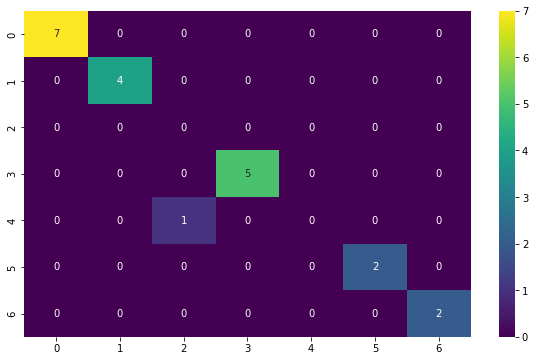

In [134]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, test_pred1), annot=True, cmap = 'viridis');